In [2]:
import math
import pandas as pd
import random

In [3]:
def calc_euclidean_distance(row1, row2):
    if (len(row1) != len(row2)):
        raise Exception("Something is wrong with your data! Both rows are not the same size")
    distance = 0.0
    for i in range(len(row1)-1):
        # assume that last row is value we want to predict
        # use for loop so that we can scale for higher dimensions as well
        distance = distance + (row1[i] - row2[i]) ** 2
    return math.sqrt(distance)

In [36]:
def get_most_similar_neighbors(train, test, k):
    distances = []
    for row in train:
        curr_dist = calc_euclidean_distance(row, test)
        distances.append((row, curr_dist))
    distances.sort(key = lambda x : x[1]) #sorting by distance
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

In [37]:
def make_prediction(train, test, k):
    neighbors = get_most_similar_neighbors(train, test, k)
    last_row = [curr[len(curr)-1] for curr in neighbors]
    model_prediction = max(set(last_row), key=last_row.count)
    return model_prediction

In [42]:
# Preprocessing
def clean_data_car(dataset):
    dataset['door'] = dataset['door'].replace(['5more'], '5')
    dataset['persons'] = dataset['persons'].replace(['more'], str(random.randint(0,5)))
    
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        print('[{}] ==> {}'.format(value, i)) #PRINT MAPPINGS 
        #print(lookup[value])
    for row in dataset:
        row[column] = int(lookup[row[column]])
    return lookup

def str_column_to_float(dataset, column):
    for row in dataset:
        if (type(row[column]) == str):
            row[column] = int(row[column])

In [43]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [44]:
## Model Evaluation Loop
def cross_validation_split(dataset, n_folds):
    split = list()
    copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(copy))
            fold.append(copy.pop(index))
        split.append(fold)
    return split

def evaluate_algorithm(dataset, n_folds, K):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    
    for fold in folds:
        train = list(folds)
        train.remove(fold)
        train = sum(train, [])
        test = list()
        
        for row in fold:
            row_copy = list(row)
            test.append(row_copy)
        #print(train)
        #print("\n", test, " ", len(test), " ", test[1])
        
        predicted = []
        for i in range(len(test)):
            curr_prediction = make_prediction(train, test[i], K)
            #print(curr_prediction)
            predicted.append(curr_prediction)
            
        actual = [row[-1] for row in fold]
        #print(predicted)
        #print(actual)
        
        accuracy = accuracy_metric(actual, predicted)
        
        scores.append(accuracy)
    return scores

In [50]:
def KNN_IRIS():
    dataset = pd.read_csv('iris.csv')
    test = pd.read_csv('iris_test.csv')
    
    dataset = dataset.values.tolist()
    test = test.values.tolist()

    str_column_to_int(dataset, len(dataset[0])-1)
    str_column_to_int(test, len(test[0])-1)
    
    answers = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']
    
    #print(dataset)
    
    for i in range(len(dataset[0])):
        str_column_to_float(dataset, i)
        str_column_to_float(test, i)
    

    K = 9
    n_folds = 5
    scores = evaluate_algorithm(dataset, n_folds, K)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    
    
#     right = 0
#     wrong = 0
#     x = 1
#     for x in range(len(test)):
#         curr_prediction = make_prediction(dataset, test[x], K)
#         print("Prediction: ", answers[curr_prediction], " , Actual: ", answers[test[x][4]])
#         if (answers[curr_prediction] == answers[test[x][4]]):
#             right += 1
#         else:
#             wrong += 1
#         x += 1
        
#     print(right / (right + wrong))

KNN_IRIS()

[Iris-virginica] ==> 0
[Iris-setosa] ==> 1
[Iris-versicolor] ==> 2
[Iris-virginica] ==> 0
[Iris-setosa] ==> 1
[Iris-versicolor] ==> 2
Scores: [1.0, 0.9523809523809523, 0.9523809523809523, 1.0, 0.9047619047619048]
Mean Accuracy: 0.962%


In [48]:
def KNN_CAR():
    ## NOTE TO SELF REPLACE ALL TRAINS WITH TESTS
    dataset = pd.read_csv('car.csv')
    train_dataset = pd.read_csv('car_train.csv')
    
    clean_data_car(dataset)
    clean_data(train_dataset)
    
    dataset = dataset.values.tolist()
    train_dataset = train_dataset.values.tolist()
    
    print(dataset[1])
    #print(type(dataset))
    
    str_column_to_int(dataset, 0)
    str_column_to_int(dataset, 1)
#     str_column_to_int(dataset, 2)
#     str_column_to_int(dataset, 3)
    str_column_to_int(dataset, 4)
    str_column_to_int(dataset, 5)
    str_column_to_int(dataset, len(dataset[0])-1)
    
    str_column_to_int(train_dataset, 0)
    str_column_to_int(train_dataset, 1)
#     str_column_to_int(train_dataset, 2)
#     str_column_to_int(train_dataset, 3)
    str_column_to_int(train_dataset, 4)
    str_column_to_int(train_dataset, 5)
    str_column_to_int(train_dataset, len(dataset[0])-1)
    
    for i in range(len(dataset[0])):
        str_column_to_float(dataset, i)
        str_column_to_float(train_dataset, i)
        
    #print(dataset)
    K = 9
    x = 1
    #print(train_dataset[1])
    
    """
    Car CSV
    [vgood] ==> 0
    [unacc] ==> 1
    [acc] ==> 2
    [good] ==> 3
    mappings for predictions
    """
    
    predictions = ["vgood", "unacc", "acc", "good"]
    right = 0
    wrong = 0
    for x in range(len(train_dataset)):
        curr_prediction = make_prediction(dataset, train_dataset[x], K)
        #print("Prediction: ", predictions[curr_prediction], " , Actual: ", predictions[train_dataset[x][6]])
        if (predictions[curr_prediction] == predictions[train_dataset[x][6]]):
            right += 1
        else:
            wrong += 1
        x += 1
        
    print(right / (right + wrong))

KNN_CAR()

NameError: name 'clean_data' is not defined

In [ ]:
def test():
#     dataset = [[2.7810836,2.550537003,0],
#         [1.465489372,2.362125076,0],
#         [3.396561688,4.400293529,0],
#         [1.38807019,1.850220317,0],
#         [3.06407232,3.005305973,0],
#         [7.627531214,2.759262235,1],
#         [5.332441248,2.088626775,1],
#         [6.922596716,1.77106367,1],
#         [8.675418651,-0.242068655,1],
#         [7.673756466,3.508563011,1]]    

#     Test Function for euclidean dist
#     row0 = dataset[0]
#     for row in dataset:
#         distance = calc_euclidean_distance(row0, row)
#         print(distance)

#     Test Function for getting similar neighbors
#     neighbors = get_most_similar_neighbors(dataset, dataset[0], 3)
#     for neighbor in neighbors:
#         print(neighbor)

    #Test Function for making prediction 
    prediction = make_prediction(dataset, dataset[0], 3)
    print('Expected {} and Got {}.'.format(dataset[0][-1], prediction))

test()

In [45]:
abc = "jef"
if (type(abc) == str):
    print("2")

2


[[3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 ...
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]]
[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.34 5.34 5.34 ... 5.34 5.34 5.34]
 [5.36 5.36 5.36 ... 5.36 5.36 5.36]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]]
Z:  [0 0 0 ... 2 2 2]   61600
[[3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 ...
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]]
[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.34 5.34 5.34 ... 5.34 5.34 5.34]
 [5.36 5.36 5.36 ... 5.36 5.36 5.36]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]]
Z:  [0 0 0 ... 2 2 2]   61600


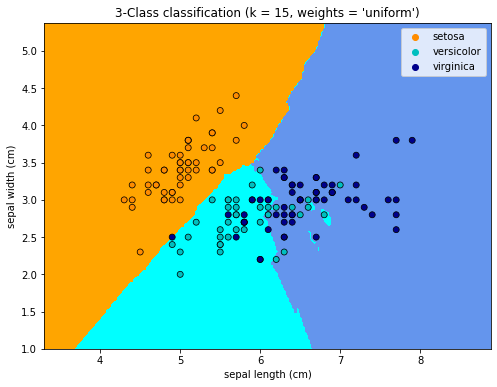

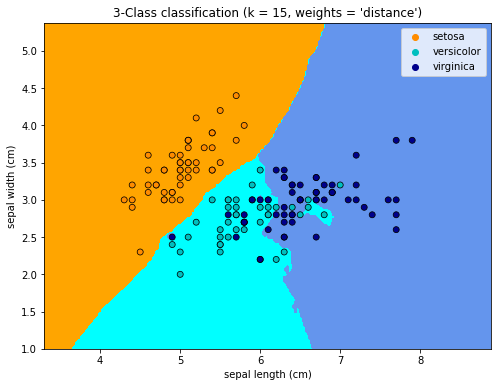

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    print(xx)
    print(yy)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print("Z: ", Z, " ", len(Z))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()